# Tarea 2

Utilizando la bbdd brandrating.csv  
  
   1. Realizar un heatmap de correlación entre los atributos.
   2. Calcular los componentes principales. ¿Cuál es la proporción de la varianza explicada acumulada hasta el componente principal 3?
   3. Grafique la varianza explicada para 9 componentes principales 
   4. Crear un dataframe y heatmap con con los componentes principales y los atributos. ¿Qué significa que el valor en la celda **"componente principal 2"** / **"leader"**, sea alto? ¿Qué valor es? 
   5. Utilizando el promedio como agregación ¿Cuáles son los atributos dónde la marca **e** es mejor que la marca **a**?

In [70]:
# Librerías

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

# Métodos

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [71]:
# Lectura del CSVebu

df_brandrating = pd.read_csv("https://raw.githubusercontent.com/patriciomalleag/Proyectos_Analisis_Varios/master/DS_Module_4/Homework_2/brandrating.csv")

In [72]:
# Vista del dataframe

df_brandrating.head(5)

,perform,leader,latest,fun,serious,bargain,value,trendy,rebuy,brand
0,2,4,8,8,2,9,7,4,6,a
1,1,1,4,7,1,1,1,2,2,a
2,2,3,5,9,2,9,5,1,6,a
3,1,6,10,8,3,4,5,2,1,a
4,1,1,5,8,1,9,9,1,1,a


In [73]:
# Estadísticas descriptivas del dataframe

df_brandrating.describe()

,perform,leader,latest,fun,serious,bargain,value,trendy,rebuy
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,4.488000,4.417000,6.195000,6.06800,4.323000,4.259000,4.33700,5.220000,3.727000
std,3.203454,2.608432,3.078059,2.74425,2.778199,2.667027,2.39858,2.742101,2.544592
min,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.00000,1.000000,1.000000
25%,1.000000,2.000000,4.000000,4.00000,2.000000,2.000000,2.00000,3.000000,1.000000
50%,4.000000,4.000000,7.000000,6.00000,4.000000,4.000000,4.00000,5.000000,3.000000
75%,7.000000,6.000000,9.000000,8.00000,6.000000,6.000000,6.00000,7.000000,5.000000
max,10.000000,10.000000,10.000000,10.00000,10.000000,10.000000,10.00000,10.000000,10.000000


---

Al parecer el dataframe esta limpio y sin outliers, por lo que se puede realizar el análisis sin un preprocesamiento previo.

---

In [74]:
df_brandrating_numeric = df_brandrating.drop(["brand"], axis = 'columns')
df_brandrating_numeric

,perform,leader,latest,fun,serious,bargain,value,trendy,rebuy
0,2,4,8,8,2,9,7,4,6
1,1,1,4,7,1,1,1,2,2
2,2,3,5,9,2,9,5,1,6
3,1,6,10,8,3,4,5,2,1
4,1,1,5,8,1,9,9,1,1
...,...,...,...,...,...,...,...,...,...
995,2,2,3,6,4,8,5,1,2
996,3,2,6,7,1,3,3,2,1
997,1,1,10,10,1,6,5,5,2
998,1,1,7,5,1,1,2,5,1


In [75]:
# Matriz de correlación

df_corr = df_brandrating_numeric.corr(method ='pearson')

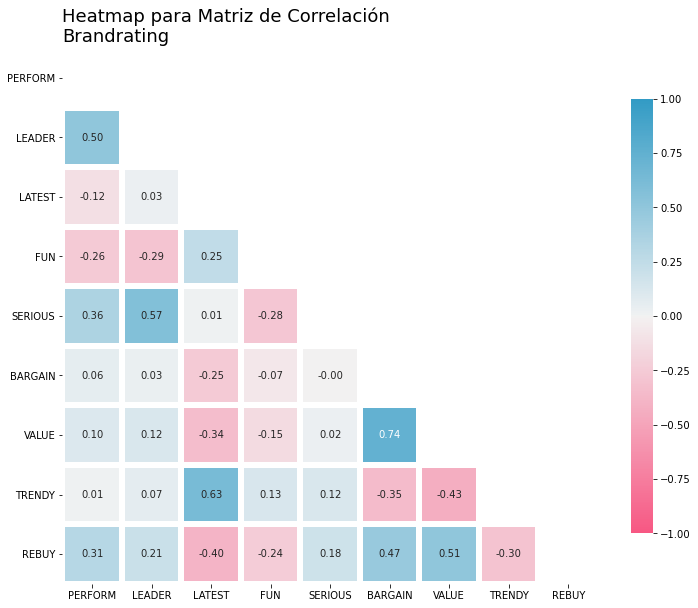

In [76]:
# HeatMap

fig, ax = plt.subplots(figsize=(12, 10))

mask = np.triu(np.ones_like(df_corr, dtype=np.bool))

corr = df_corr.copy()

cmap = sb.diverging_palette(0, 230, 90, 60, as_cmap=True)

sb.heatmap(corr, mask=mask, annot=True, fmt=".2f", 
           linewidths=5, cmap=cmap, vmin=-1, vmax=1, 
           cbar_kws={"shrink": .8}, square=True)

yticks = [i.upper() for i in corr.index]
xticks = [i.upper() for i in corr.columns]
plt.yticks(plt.yticks()[0], labels=yticks, rotation=0)
plt.xticks(plt.xticks()[0], labels=xticks)

title = 'Heatmap para Matriz de Correlación\nBrandrating'
plt.title(title, loc='left', fontsize=18)
plt.show()

---

Con esto tenemos el heatmap de la matriz de correlaciones para las variables numéricas.

---

In [77]:
# Estandarización de valores

features = ["perform","leader","latest","fun","serious","bargain","value","trendy","rebuy"]

x = df_brandrating.loc[:, features].values
y = df_brandrating.loc[:,["brand"]].values

x_std = StandardScaler().fit_transform(x)

In [78]:
# Varianza explicada para 3 componentes

pca = PCA(n_components = 3)
principalComponents = pca.fit_transform(x_std)

pca.explained_variance_ratio_

array([0.33103284, 0.23295019, 0.11991721])

In [79]:
pca.explained_variance_ratio_.sum()

0.683900234685731

---

Luego, con 3 componentes principales podemos explicar poco más del 68% de la varianza.

---

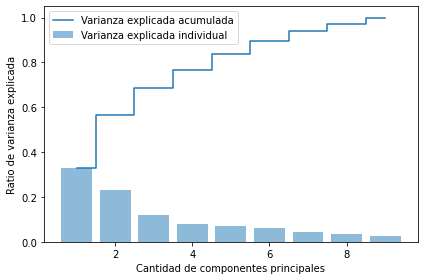

In [80]:
# Gráfico acumulado de la varianza explicada

pca_2 = PCA()

x_train_pca = pca_2.fit_transform(x_std)

exp_var_pca = pca_2.explained_variance_ratio_

cum_sum_eigenvalues = np.cumsum(exp_var_pca)

plt.bar(range(1,len(exp_var_pca)+1), exp_var_pca, alpha=0.5, align='center', label='Varianza explicada individual')
plt.step(range(1,len(cum_sum_eigenvalues)+1), cum_sum_eigenvalues, where='mid',label='Varianza explicada acumulada')
plt.ylabel('Ratio de varianza explicada')
plt.xlabel('Cantidad de componentes principales')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

---

Ya con las 9 componentes principales consideradas llegaríamos a la explicación de un 100% de las variables.

---

In [94]:
# Correlacion componentes principales y variables

loadings = pca_2.components_
num_pc = pca_2.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = features
loadings_df = loadings_df.set_index('variable')
loadings_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
variable,,,,,,,,,
perform,0.237468,0.419912,-0.038540,-0.526309,0.467934,-0.337068,-0.364179,-0.144447,0.052234
leader,0.205826,0.523819,0.095127,-0.089235,-0.294530,-0.296886,0.613674,0.287661,-0.178895
latest,-0.370381,0.201453,0.532731,0.214108,0.105867,-0.174206,0.185480,-0.642904,0.057502
fun,-0.251060,-0.250380,0.417813,-0.750640,-0.331494,0.140537,0.007115,0.074613,0.031533
serious,0.159740,0.510473,0.040671,0.098934,-0.555155,0.392487,-0.445303,-0.183548,0.090722
bargain,0.399173,-0.218497,0.489898,0.167343,-0.012574,-0.139397,-0.288265,0.057892,-0.647208
value,0.447456,-0.189808,0.369245,0.151185,-0.063278,-0.219533,-0.017163,0.148293,0.728061
trendy,-0.351029,0.318490,0.370905,0.167644,0.366497,0.265819,-0.153572,0.614503,0.059070
rebuy,0.439018,0.015098,0.124616,-0.130312,0.355688,0.675140,0.388656,-0.202107,-0.017202


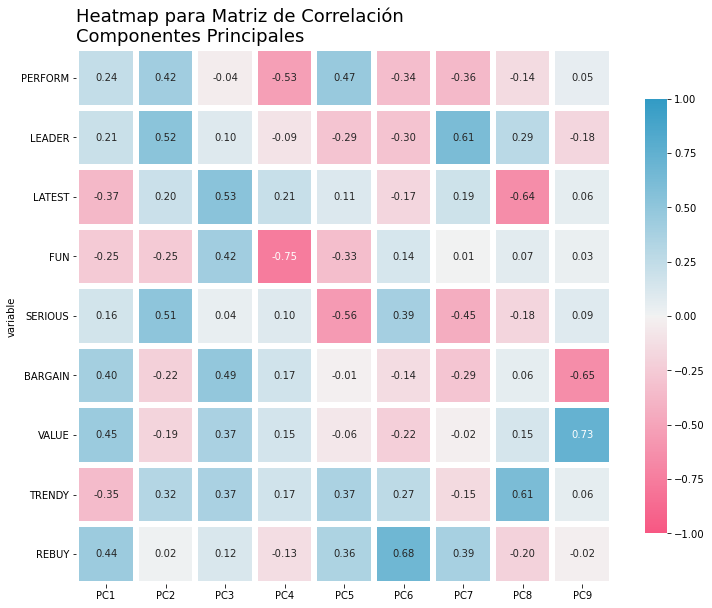

In [97]:
# HeatMap

fig, ax = plt.subplots(figsize=(12, 10))

corr = loadings_df.copy()

cmap = sb.diverging_palette(0, 230, 90, 60, as_cmap=True)

sb.heatmap(corr, annot=True, fmt=".2f", 
           linewidths=5, cmap=cmap, vmin=-1, vmax=1, 
           cbar_kws={"shrink": .8}, square=True)

yticks = [i.upper() for i in corr.index]
xticks = [i.upper() for i in corr.columns]
plt.yticks(plt.yticks()[0], labels=yticks, rotation=0)
plt.xticks(plt.xticks()[0], labels=xticks)

title = 'Heatmap para Matriz de Correlación\nComponentes Principales'
plt.title(title, loc='left', fontsize=18)
plt.show()

---

Que la celda **PC2/leader** sea alto (0.52) quiere decir que la segunda componente principal se explica en un 52% por la variable leader. 

---

In [104]:
# Promedio de atributos

df_mean = df_brandrating.groupby(["brand"], as_index = False).mean()
df_mean[(df_mean["brand"]=='a') | (df_mean["brand"]=='e')]

,brand,perform,leader,latest,fun,serious,bargain,value,trendy,rebuy
0,a,1.65,3.04,7.46,7.87,1.77,4.83,4.78,3.78,2.21
4,e,2.68,4.92,7.60,6.88,4.44,5.73,5.34,5.60,3.82


---

El atributo e tiene mayor promedio en todos los atributos salvo en **fun**.

---